# Histogram Visualization

In [1]:
%matplotlib inline

import json

import os
from datetime import datetime
import pandas as pd

from matplotlib import pyplot as plt

with open(os.path.expanduser("~/work/.circonusrc.json"),"r") as fh:
    config = json.load(fh)
api_token = config['demo']
from circonusapi import circonusdata
circ = circonusdata.CirconusData(api_token)

In [2]:
AH = circ.caql('search:metric:histogram("api`GET`/getState")', datetime(2018,1,1), 60*60, 24)

In [3]:
H = AH['output[0]'][0]

In [4]:
def _xrange(H):
    emin = H.quantile(0.1)
    emax = H.quantile(0.9)
    edst = emax - emin
    p = 1.5
    if emin >= 0:
        return (0, emax + p * edst)
    if emax <= 0:
        pass
    else:
        pass

In [52]:
H.insert(-34,200)

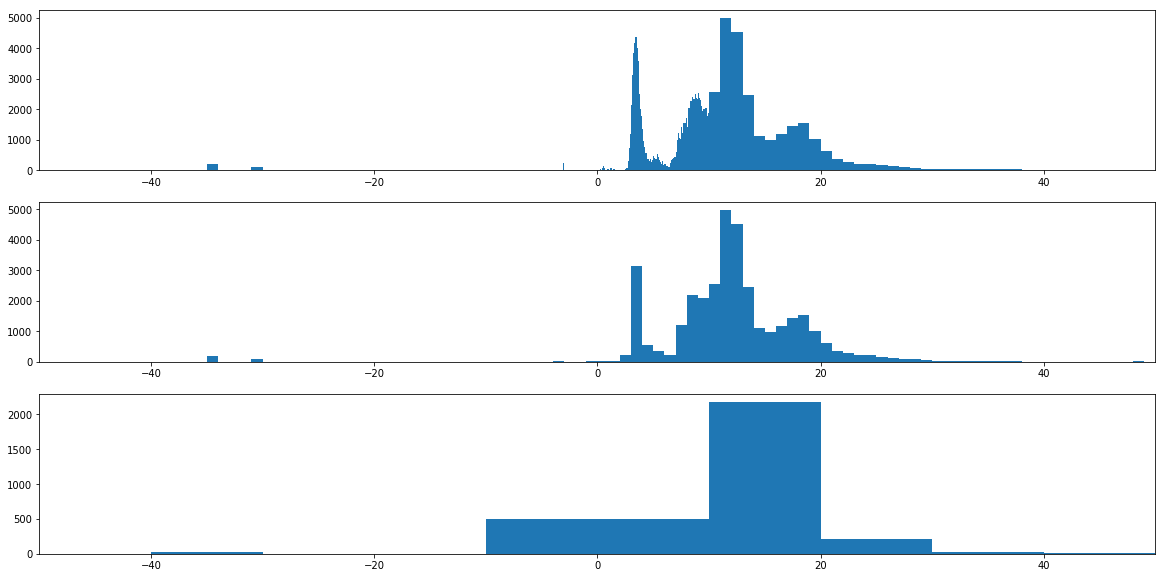

In [54]:
def circllhist_plot(H,*,ax=None,mbe = 0, **kwargs):
    mb = 10 ** mbe
    H = H.compress_mbe(mbe)
    if not ax:
        ax = plt.subplot(1,1,1)
    x=[] # midpoints
    h=[] # height
    w=[] # widths
    for b, c in H:
        if b.val() == 0:
            # 0 bucket, spans -mb ... +mb
            wdt = 2*mb
            x.append(0)
            w.append(wdt)
            h.append(c/wdt)
        elif b.exp() == mbe :
            # mbe buckets are scaled by a factor of 10
            sgn = 1 if b.val() > 0 else -1
            wdt = b.width() * 10
            mid = b.edge()  + sgn * wdt/2
            x.append(mid)
            w.append(wdt)
            h.append(c/wdt)
        else:
            x.append(b.midpoint())
            w.append(b.width())
            h.append(c/b.width())
    ax.bar(x,h,w,**kwargs)
    ax.set_xlim(-50,50)
    return ax

plt.figure(figsize=(20,10))
circllhist_plot(H,mbe=-1, ax=plt.subplot(3,1,1), alpha=1)
circllhist_plot(H,mbe=0,  ax=plt.subplot(3,1,2), alpha=1)
circllhist_plot(H,mbe=1,  ax=plt.subplot(3,1,3), alpha=1)